<a href="https://colab.research.google.com/github/PalakTolwani/Smart-Cloud-Analytic-Business-Forecasting/blob/main/ETL_Palak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
#from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
# Replace with your actual file path on Google Drive
file_path = '/content/DataSet.csv'
df = pd.read_csv(file_path)

# Preview the first few rows
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/DataSet.csv'

In [ ]:
col= df.columns
print(col)

Index(['Customer_ID', 'Age', 'Gender', 'Religion', 'Season', 'Festival',
       'Fashion_Trend', 'Purchasing Power', 'Avg_Spend', 'Family_Size',
       'Urban_Rural', 'Education_Level', 'Preferred_Clothing_Type', 'Color',
       'Pattern', 'Material', 'Fashion_Influence_Source', 'Cluster',
       'Fashion Influence', 'Product Range', 'Customer Experience',
       'Online Presence'],
      dtype='object')


In [ ]:
df.info()

# Check for missing values
df.isnull().sum()


In [ ]:
# Convert columns that should be numeric to numeric type
for col in df.columns:
    if df[col].dtype == 'object':  # If the column is of object type (likely string)
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce') # Convert to numeric, invalid parsing will be set as NaN.
        except ValueError:
            print(f"Could not convert column '{col}' to numeric. It might contain non-numeric values.")

# Now fill the missing values with the mean for numeric columns
df.fillna(df.mean(), inplace=True)

In [ ]:
df.describe()

In [ ]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

2025-04-27 04:09:11.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:09:11.796 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:09:11.797 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:09:11.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:09:11.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:09:11.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:09:11.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:09:11.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

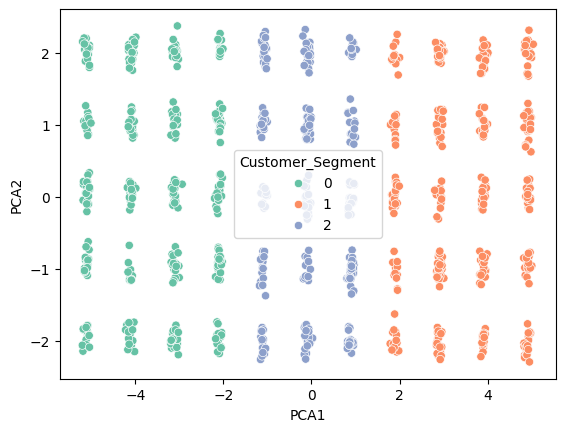

In [ ]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

st.set_page_config(page_title="Fashion Customer Segmentation & Prediction", layout="wide")
st.title("🛍️ Fashion Customer Segmentation & Clothing Preference Prediction")

# Functions for ETL pipeline
def extract_data(uploaded_file):
    return pd.read_csv(uploaded_file)

def transform_data(df):
    # Drop ID column if present
    df = df.drop(columns=['Customer_ID'], errors='ignore')

    # Identify columns
    numerical_cols = ['Age', 'Avg_Spend', 'Family_Size']
    categorical_cols = df.select_dtypes(include='object').columns.tolist()

    # Handle missing values
    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')

    df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

    # Encode categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    # Normalize numeric features
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return df, numerical_cols, categorical_cols

def load_data(df, output_path='cleaned_data.csv'):
    df.to_csv(output_path, index=False)

# Option to use default file or upload
use_default = st.checkbox("Use default Dataset.csv file", value=True)

if use_default:
    raw_df = extract_data("/content/DataSet.csv")
else:
    uploaded_file = st.file_uploader("Upload your CSV file", type=["csv"])
    if uploaded_file is not None:
        raw_df = extract_data(uploaded_file)
    else:
        st.stop()

st.subheader("Raw Data Preview")
st.dataframe(raw_df.head())

# TRANSFORM
df, numerical_cols, categorical_cols = transform_data(raw_df)

# LOAD (optional)
load_data(df)

st.subheader("Transformed Data Preview")
st.dataframe(df.head())

# Step 4: KMeans Clustering
st.subheader("📊 Customer Segmentation using KMeans")
k = st.slider("Select number of clusters:", 2, 10, 3)
kmeans = KMeans(n_clusters=k, random_state=42)
df['Customer_Segment'] = kmeans.fit_predict(df[numerical_cols + categorical_cols])

# PCA for 2D visualization
if len(numerical_cols + categorical_cols) >= 2:
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df[numerical_cols + categorical_cols])
    df[['PCA1', 'PCA2']] = pca_result

    fig, ax = plt.subplots()
    sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Customer_Segment', palette='Set2', ax=ax)
    st.pyplot(fig)
else:
    st.warning("Not enough features for PCA visualization.")

# Step 5: Random Forest Prediction
st.subheader("🎯 Predict Preferred Clothing Type")
if 'Preferred_Clothing_Type' in raw_df.columns:
    X = df.drop(columns=['Preferred_Clothing_Type', 'PCA1', 'PCA2'], errors='ignore')
    y = df['Preferred_Clothing_Type'] if 'Preferred_Clothing_Type' in df.columns else None

    if y is not None:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)

        st.write("Random Forest Classification Report:")
        st.dataframe(pd.DataFrame(report).transpose())
else:
    st.warning("Column 'Preferred_Clothing_Type' is missing in your dataset.")




In [ ]:
st.subheader("📋 Segment Profiles")
segment_profiles = df.groupby('Customer_Segment')[numerical_cols + categorical_cols].mean()
st.dataframe(segment_profiles)


2025-04-27 04:09:23.124 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:09:23.126 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:09:23.140 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:09:23.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
segment_counts = df['Customer_Segment'].value_counts().sort_index()
st.write("Number of customers in each segment:")
st.bar_chart(segment_counts)


2025-04-27 04:09:52.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:09:52.570 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:09:52.574 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:09:52.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:09:53.170 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:09:53.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
st.markdown("""
**What does this mean?**

- The scatterplot shows how customers are grouped into segments based on similar characteristics.
- Each color represents a different segment.
- You can use the table above to see what defines each group.
""")


2025-04-27 04:10:29.791 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:10:29.797 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
for seg in df['Customer_Segment'].unique():
    st.write(f"Example customers from Segment {seg}:")
    st.dataframe(df[df['Customer_Segment'] == seg].head(3))


2025-04-27 04:10:51.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:10:51.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:10:51.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:10:51.574 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:10:51.584 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:10:51.595 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:10:51.600 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:10:51.604 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
st.markdown("""
### Business Insights

- **Segment 0:** Consider targeting with premium offers due to higher average spend.
- **Segment 1:** May respond well to family-oriented promotions.
- **Segment 2:** Could benefit from loyalty programs to increase retention.
""")


2025-04-27 04:11:47.889 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:11:47.891 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Customer_Segment', palette='Set2', ax=ax)
ax.set_title("Customer Segments (PCA Projection)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.legend(title='Segment')
st.pyplot(fig)


2025-04-27 04:11:32.600 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:11:32.960 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:11:32.961 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
pip install --upgrade streamlit


In [ ]:
import streamlit as st
st.write(st.__version__)


2025-04-27 04:16:55.649 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:16:55.651 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:16:55.652 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 04:16:55.653 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
